In [29]:
#importing library
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt      
import random 
import seaborn as sns
%matplotlib inline



from tensorflow.keras.datasets import mnist    
from keras.models import Sequential  

from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils  
from keras.utils.np_utils import to_categorical

In [30]:
#loading datasets
train=pd.read_csv(r'C:\Users\Anupam Mishra\Desktop\Projects\Digit Recognizer\data\train.csv')
test=pd.read_csv(r'C:\Users\Anupam Mishra\Desktop\Projects\Digit Recognizer\data\test.csv')

###### Data Analysis

In [31]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
train.shape

(42000, 785)

In [34]:
test.shape

(28000, 784)

In [35]:
x_train=train.drop(['label'],1)
y_train=train['label']

In [36]:
x_train=np.array(x_train)
test=np.array(test)

In [37]:
x_train.shape

(42000, 784)

In [38]:
test.shape

(28000, 784)

In [39]:
x_train=x_train.reshape(42000,28,28)
test=test.reshape(28000,28,28)


In [40]:
x_train=x_train/255
test=test/255

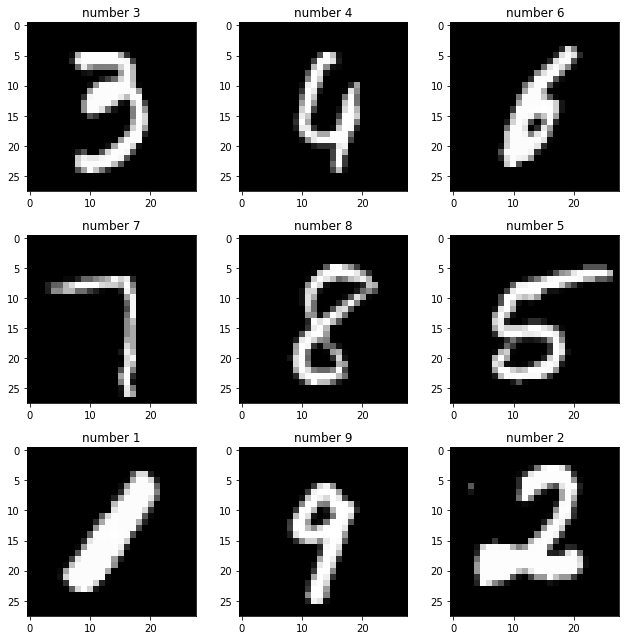

In [41]:
plt.rcParams['figure.figsize'] = (9,9)
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train)) # Index
    plt.imshow(x_train[num], cmap='gray', interpolation='nearest')
    plt.title("number {}".format(y_train[num]))
    
plt.tight_layout()

In [48]:
target=x_train.reshape(-1,28,28,1)
test=test.reshape(-1,28,28,1)
y_train=np.array(y_train)
train_label=to_categorical(y_train)

train_label.shape


(42000, 10)

In [43]:
#model architecture
model=Sequential([
    Conv2D(32,(5,5) , activation='relu' , input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64,(5,5), activation ='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(64,(3,3), activation ='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)         

In [45]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
model.fit(target,train_label,epochs=10,batch_size=64)


Epoch 1/10
657/657 [==============================] - 21s 29ms/step - loss: 0.7364 - accuracy: 0.7539
Epoch 2/10
657/657 [==============================] - 20s 30ms/step - loss: 0.1123 - accuracy: 0.9659
Epoch 3/10
657/657 [==============================] - 21s 32ms/step - loss: 0.0800 - accuracy: 0.9770
Epoch 4/10
657/657 [==============================] - 21s 32ms/step - loss: 0.0579 - accuracy: 0.9824
Epoch 5/10
657/657 [==============================] - 21s 33ms/step - loss: 0.0519 - accuracy: 0.9842
Epoch 6/10
657/657 [==============================] - 22s 34ms/step - loss: 0.0430 - accuracy: 0.9875
Epoch 7/10
657/657 [==============================] - 23s 35ms/step - loss: 0.0375 - accuracy: 0.9876
Epoch 8/10
657/657 [==============================] - 22s 33ms/step - loss: 0.0371 - accuracy: 0.9881
Epoch 9/10
657/657 [==============================] - 24s 36ms/step - loss: 0.0316 - accuracy: 0.9900
Epoch 10/10
657/657 [==============================] - 24s 36ms/step - loss: 0.029

In [49]:
Y_pred = model.predict(test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

In [58]:
def test_output(i):
  plt.imshow(x_train[i],cmap='gray')
  predicted=np.argmax(model.predict(target[i].reshape(-1,28,28,1)))
  actual=np.argmax(train_label[i])
  plt.xlabel(f'predicted= {predicted}  Actual= {actual}')

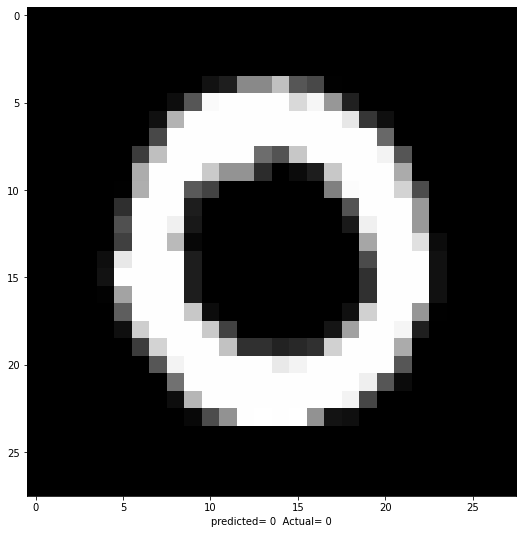

In [67]:
test_output(1)

#### Trying model on real life Images

In [68]:
from PIL import Image, ImageGrab

In [72]:
def predict_digit1(img):
    img = Image.open(img)
    plt.imshow(img)
    img = img.convert('L', dither=Image.NONE)
    img = img.resize((28,28))
    img = np.array(img)
    img=np.invert(img)
    predicted=np.argmax(model.predict(img.reshape(-1,28,28,1)))
    plt.imshow(img,interpolation='nearest')
    plt.xlabel(f'Predicted= {predicted}')

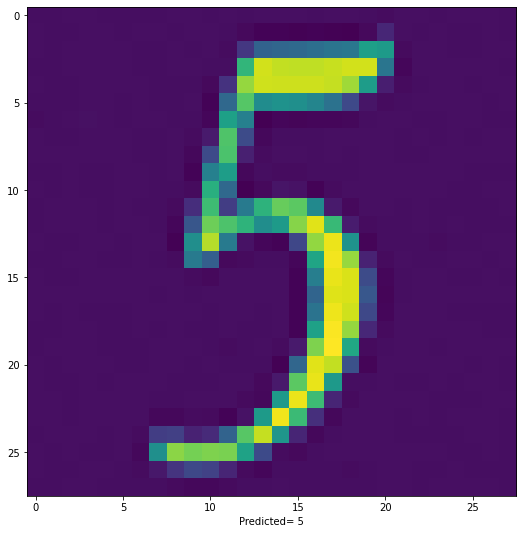

In [77]:
predict_digit1(r'C:\Users\Anupam Mishra\Desktop\Projects\Digit Recognizer\test 1.jfif')

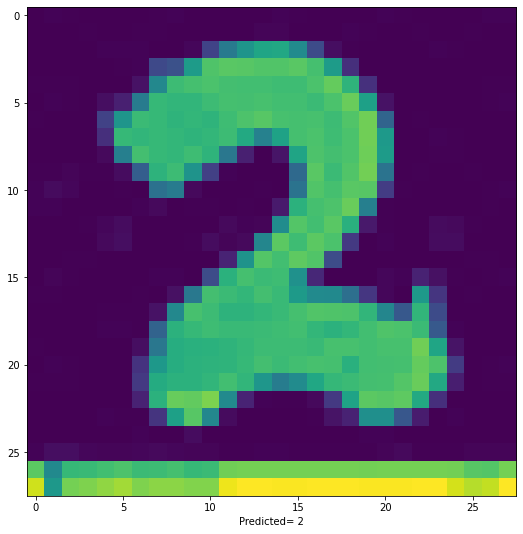

In [78]:
predict_digit1(r'C:\Users\Anupam Mishra\Desktop\Projects\Digit Recognizer\test.jfif')